In [4]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df.sample(5)

,review,sentiment
31029,I read the book and really enjoyed it from beg...,negative
11642,It all starts with a suicide. Or is it a car c...,positive
43017,It seems to me that a lot of people don't know...,positive
44308,This picture was released in May of 1979 starr...,positive
23419,What can I say? An excellent end to an excelle...,positive


In [5]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)

In [6]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 74s 72ms/step - loss: 0.4121 - accuracy: 0.8107 - val_loss: 0.3109 - val_accuracy: 0.8698
Epoch 2/10
1000/1000 [==============================] - 94s 94ms/step - loss: 0.2600 - accuracy: 0.8969 - val_loss: 0.3153 - val_accuracy: 0.8670
Epoch 3/10
1000/1000 [==============================] - 63s 63ms/step - loss: 0.2147 - accuracy: 0.9187 - val_loss: 0.3311 - val_accuracy: 0.8683
Epoch 4/10
1000/1000 [==============================] - 61s 61ms/step - loss: 0.1758 - accuracy: 0.9350 - val_loss: 0.3892 - val_accuracy: 0.8547
Epoch 5/10
1000/1000 [==============================] - 60s 60ms/step - loss: 0.1443 - accuracy: 0.9478 - val_loss: 0.4076 - val_accuracy: 0.8615
Epoch 6/10
1000/1000 [==============================] - 61s 61ms/step - loss: 0.1231 - accuracy: 0.9561 - val_loss: 0.4106 - val_accuracy: 0.8624
Epoch 7/10
1000/1000 [==============================] - 494s 494ms/step - loss: 0.1024 - accuracy: 0.9643 - val_loss: 0.4960

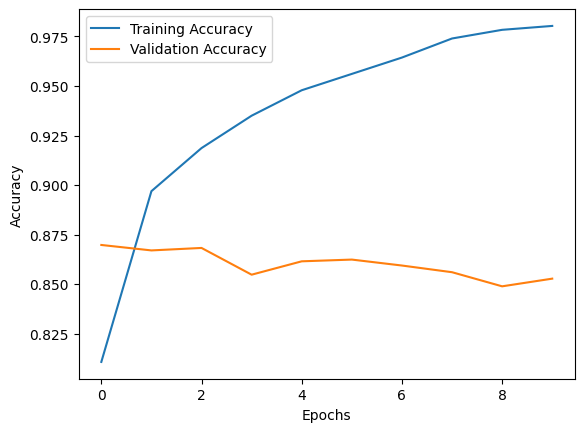

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 [==============================] - 7s 21ms/step - loss: 0.5833 - accuracy: 0.8508
Test Accuracy: 0.85


In [ ]:
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The movie was good as hell and i enjoyed it to the top",
    "I didn't like the movie at all. It was a waste of time.",
    "The acting was terrible and the story was boring."
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 [==============================] - 0s 27ms/step


['Positive', 'Positive', 'Negative', 'Negative', 'Negative']
